<a href="https://colab.research.google.com/github/sanscurtodavis/drexel_research/blob/main/notes_12_3_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo pip3 install keras

### Import modules




In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
import pandas as pd

## Data acquistion and preprocessing

In [7]:
def fetch_data(interval):
  start_date = "2017-01-01"
  end_date = "2024-01-01"

  # Define tickers for BTC and SPY
  tickers = ['SPY', 'BTC-USD']

  # Fetch historical data for the specified tickers
  data = yf.download(tickers, start=start_date, end=end_date, interval=interval, group_by="ticker")

  # Drop any NaN rows within the data
  data = data.dropna()

  # Extract Close and Volume columns for each ticker
  price_volume_data = pd.DataFrame({
      'SPY_Close': data['SPY']['Close'],
      'BTC_Close': data['BTC-USD']['Close'],
      'SPY_Volume': data['SPY']['Volume'],
      'BTC_Volume': data['BTC-USD']['Volume']
  })

  # Normalize the data using MinMaxScaler
  scaler = MinMaxScaler()
  normalized_data = pd.DataFrame(
      scaler.fit_transform(price_volume_data),
      columns=price_volume_data.columns,
      index=price_volume_data.index
  )

  return normalized_data

## Function to plot data

In [8]:
def plot_data(data, interval):
  # Plot the normalized data
  fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

  # Plot normalized prices
  axes[0].plot(data.index, data['SPY_Close'], label='SPY Price', color='blue')
  axes[0].plot(data.index, data['BTC_Close'], label='BTC Price', color='orange')
  axes[0].set_title(f'Normalized Prices ({interval}): SPY vs BTC')
  axes[0].set_ylabel('Normalized Price')
  axes[0].legend()
  axes[0].grid()

  # Plot normalized volumes
  axes[1].plot(data.index, data['SPY_Volume'], label='SPY Volume', color='blue')
  axes[1].plot(data.index, data['BTC_Volume'], label='BTC Volume', color='orange')
  axes[1].set_title(f'Normalized Volumes ({interval}): SPY vs BTC')
  axes[1].set_ylabel('Normalized Volume')
  axes[1].legend()
  axes[1].grid()

  plt.tight_layout()
  plt.show()

## Correlation matrix creation

In [9]:
def create_correlation_matrix(data):
  # Calculate the correlation matrix
  correlation_matrix = data.corr()

  # Plot the correlation matrix
  plt.figure(figsize=(10, 8))
  sns.heatmap(
      correlation_matrix,
      cbar=True,
      annot=False,
      cmap="coolwarm",
      vmin=-1,
      vmax=1,
      linewidths=0.5,
  )
  plt.title("Correlation Matrix")
  plt.show()

[*********************100%***********************]  2 of 2 completed


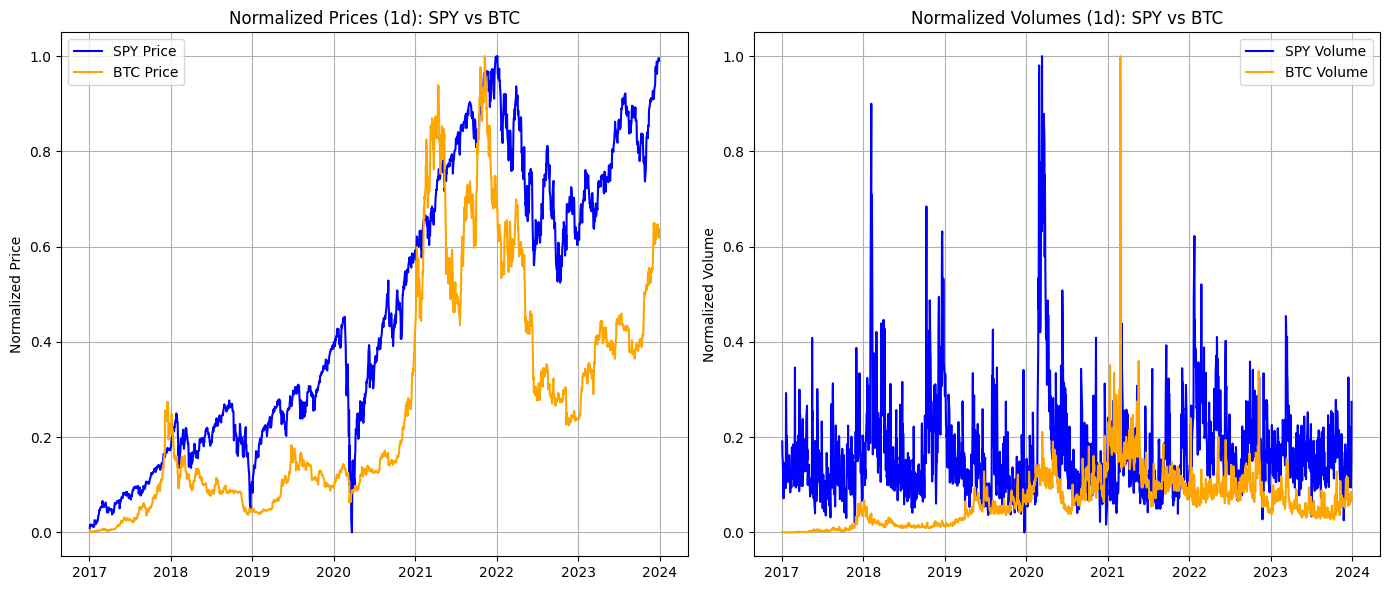

[*********************100%***********************]  2 of 2 completed


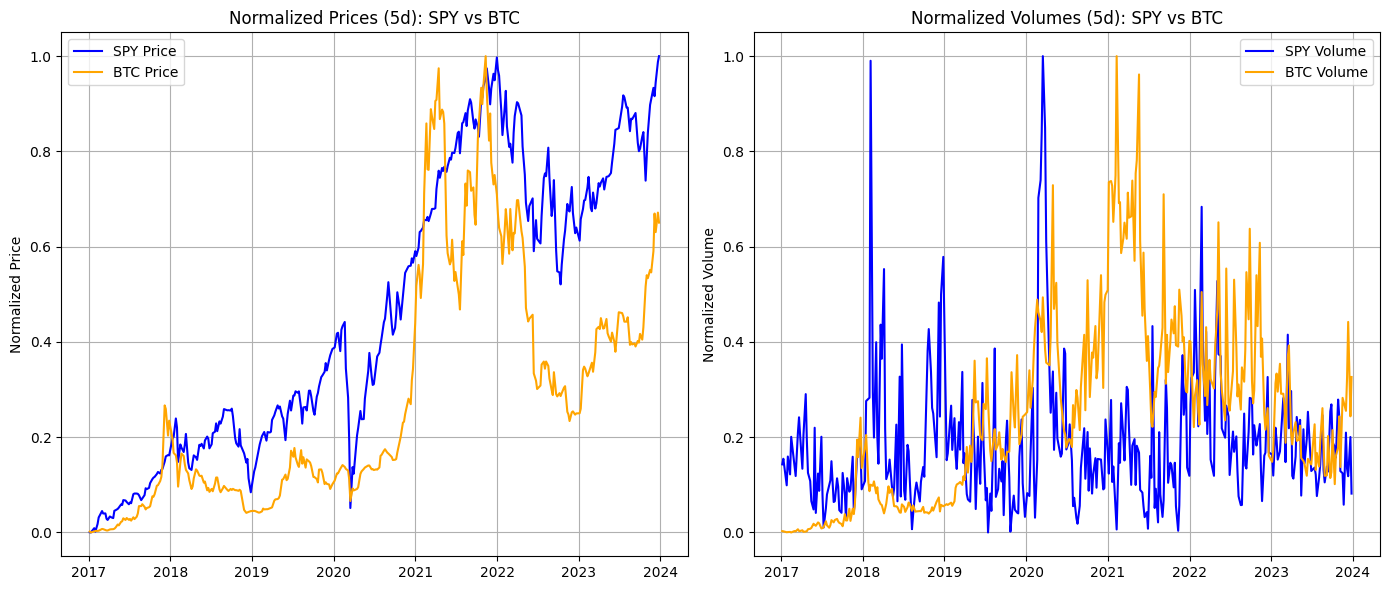

[*********************100%***********************]  2 of 2 completed


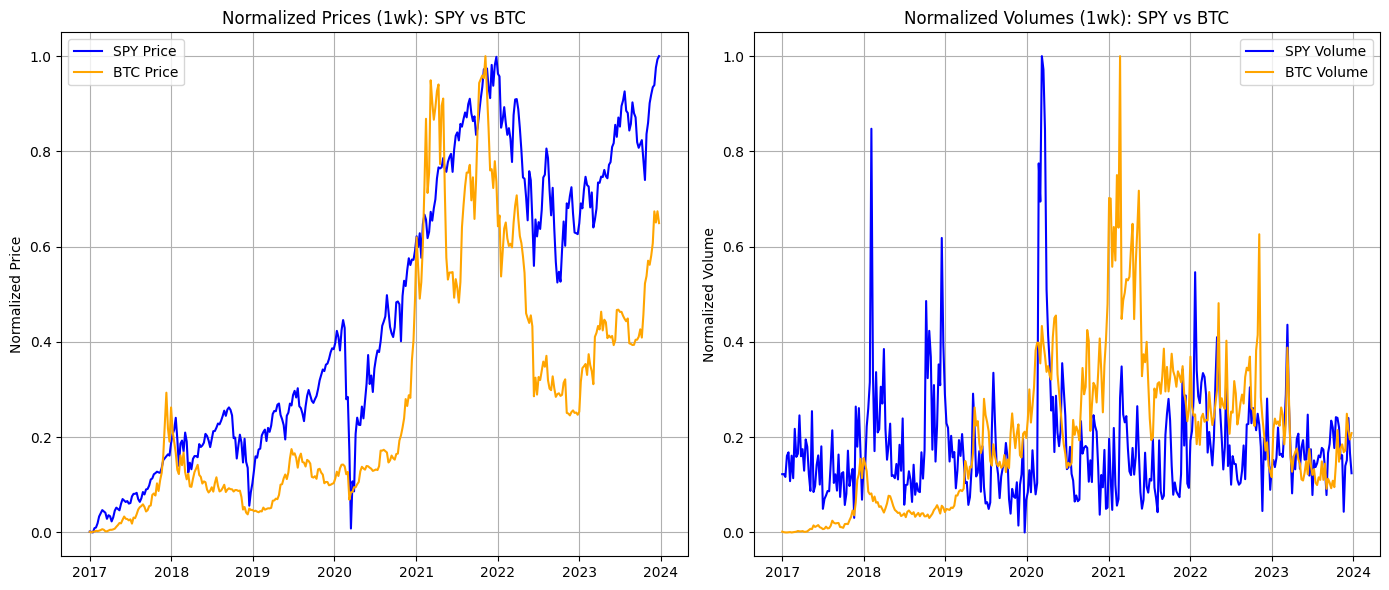

[*********************100%***********************]  2 of 2 completed


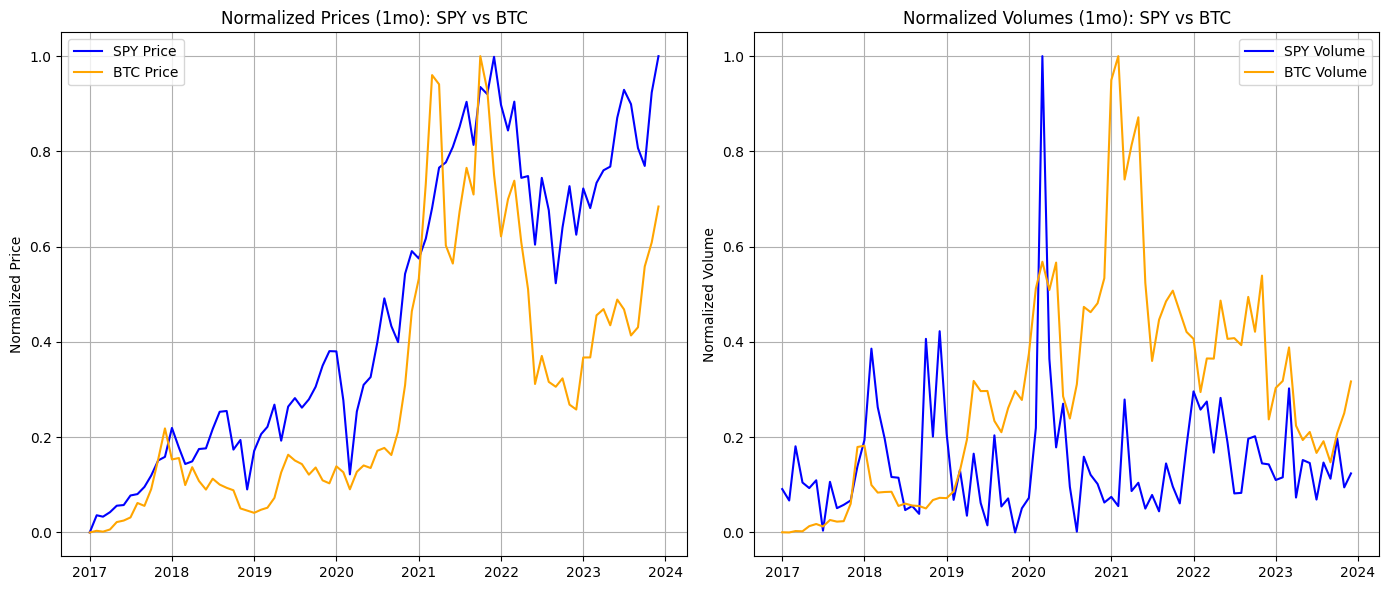

[*********************100%***********************]  2 of 2 completed


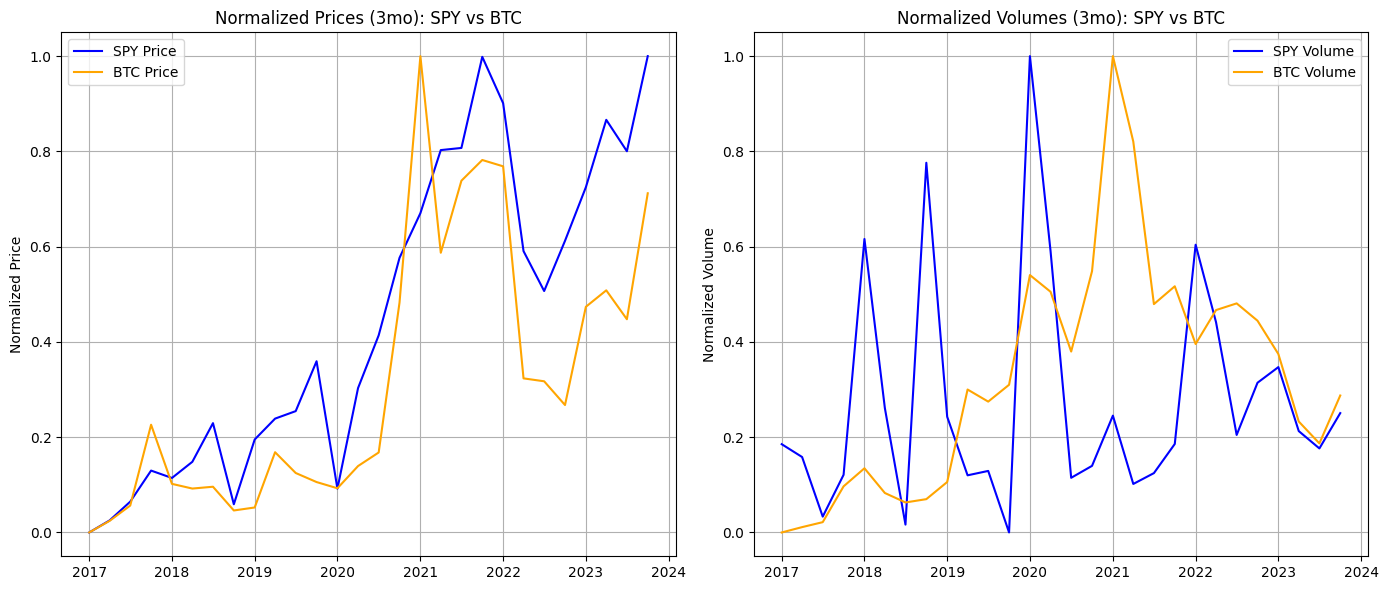

In [10]:
interval_lst = ['1d', '5d', '1wk', '1mo', '3mo']
data_lst = []

for i in range(len(interval_lst)):
  data_lst.append(fetch_data(interval_lst[i]))
  plot_data(data_lst[i], interval_lst[i])

## Noramlized stock and cryptocurrency data plotted against each other

## Machine learning component with Linear Regression